# Distance and Similarity

## 1. The Iris Data Set
[Iris data set](https://archive.ics.uci.edu/ml/datasets/iris) adalah data set "hello world" yang populer untuk data scientist. Data set ini berisi tiga spesies bunga Iris, yaitu *Iris setosa*, *Iris versicolor*, dan *Iris virginica* (lihat di bawah).

<table>
    <tr>
        <td><img src=https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/220px-Kosaciec_szczecinkowaty_Iris_setosa.jpg><br>Iris setosa</td>
        <td><img src=https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/220px-Iris_versicolor_3.jpg><br>Iris versicolor</td>
        <td><img src=https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg><br>Iris virginica</td>
    </tr>
    <tr>
        <td colspan=3><center>Tiga spesies Iris</center></td>
    </tr>
</table>

Ketiga spesies ini berbeda dalam dimensi sepal dan petal mereka. Data set ini memiliki empat atribut, yaitu *sepal length*, *sepal width*, *petal length*, and *petal width*, untuk setiap bunga.

![](https://www.integratedots.com/wp-content/uploads/2019/06/iris_petal-sepal-e1560211020463.png)


### 1.1. Reading the Iris data set

Data bisa diakses di [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris). Ada banyak file, namun yang kita perlukan adalah https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data, dengan *comma-separated*.

In [1]:
import numpy as np
import pandas as pd

#### Assignment
Tulis kode program untuk membaca data format csv dari
Write a code to read https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data file to a pandas DataFrame. Set `header=None` dan `names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris_class']` pada saat loading data, karena data tidak memiliki kolom. Simpan data yang dibaca di variabel `data`.

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

data = pd.read_csv(url, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris_class'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Supaya pekerjaan jadi lebih mudah di masa depan, kita ubah data bertipe String di kolom `iris_class` menjadi ordinal (angka 0, 1, 2):

In [3]:
data_ordinal = data.replace({'iris_class': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}})
data_ordinal.sample(5)

<ipython-input-3-bec351f733f4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_ordinal = data.replace({'iris_class': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}})


,sepal_length,sepal_width,petal_length,petal_width,iris_class
6,4.6,3.4,1.4,0.3,0
40,5.0,3.5,1.3,0.3,0
1,4.9,3.0,1.4,0.2,0
116,6.5,3.0,5.5,1.8,2
86,6.7,3.1,4.7,1.5,1


Jika sudah terbaca dengan baik, kalian bisa menjalankan kode berikut untuk menggambar histogram:

<Axes: >

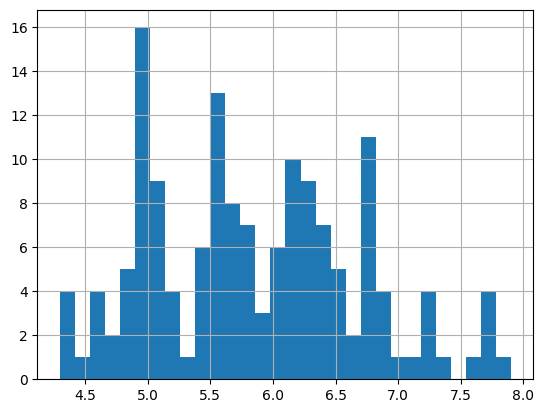

In [4]:
data.sepal_length.hist(bins=30)

Ada banyak cara memvisualisasi data. Pada contoh berikut ini distribusi `sepal length` divisualisasi berdasarkan kelasnya.

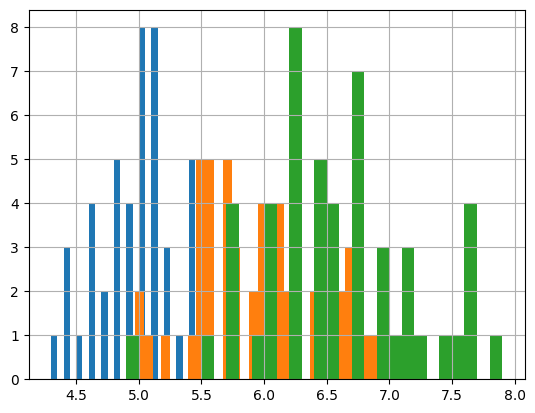

In [5]:
for class_type in data.iris_class.unique():
    data.sepal_length.iloc[np.where(data.iris_class == class_type)].hist(bins=30)

#### Assignment
- Tulis program untuk menampilkan histogram dari atribut lainnya, seperti i.e. sepal width, petal length, and petal width.
- Untuk setiap atribut, perhatikan bagaimana data bisa diklasifikasi. Perhatikan saja pola histogramnya.
- Dari pengamatan di atas, tulis program sederhana untuk klasifikasi menggunakan logika `if-else`. Lakukan uji coba, ukur akurasinya, berapa persen tepat dan berapa persen salah?

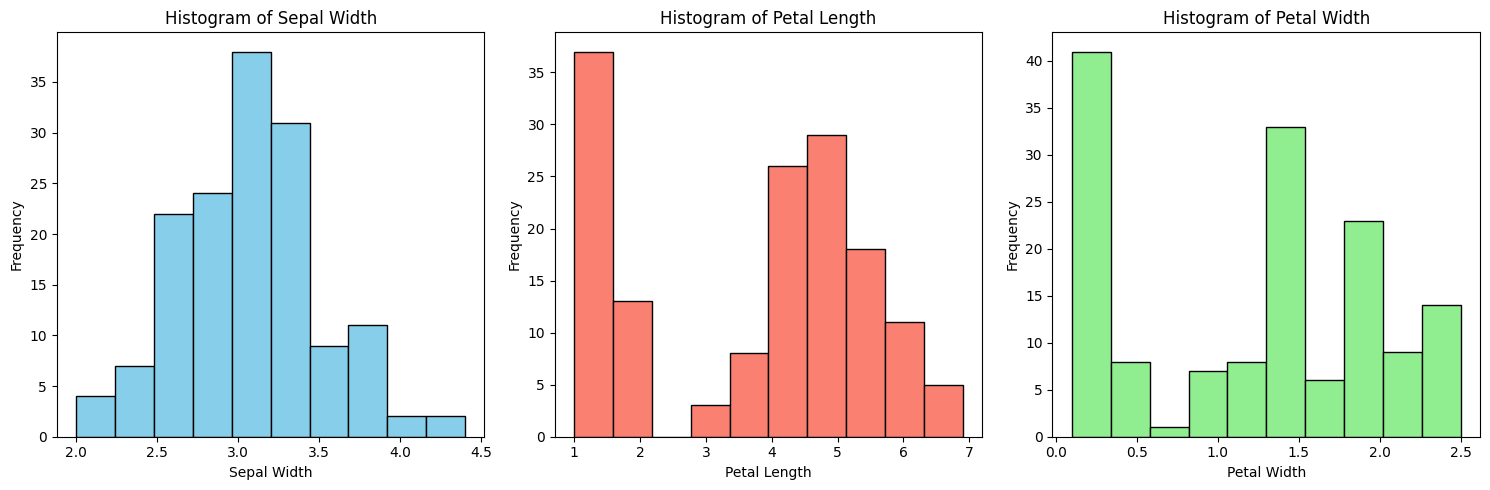

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Histogram Sepal Width
plt.subplot(1, 3, 1)
plt.hist(data['sepal_width'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Width')

# Histogram Petal Length
plt.subplot(1, 3, 2)
plt.hist(data['petal_length'], bins=10, color='salmon', edgecolor='black')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Length')

# Histogram Petal Width
plt.subplot(1, 3, 3)
plt.hist(data['petal_width'], bins=10, color='lightgreen', edgecolor='black')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Width')

plt.tight_layout()
plt.show()

In [7]:
# Classification logic based on observations
def simple_classifier(row):
    if row['petal_length'] < 2:
        return 'Iris-setosa'
    elif row['petal_length'] < 5:
        return 'Iris-versicolor'
    else:
        return 'Iris-virginica'

data['predicted_class'] = data.apply(simple_classifier, axis=1)

# Accuracy
correct_predictions = (data['predicted_class'] == data['iris_class']).sum()
total_predictions = len(data)
accuracy = correct_predictions / total_predictions * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Correct Predictions: {correct_predictions}")
print(f"Incorrect Predictions: {total_predictions - correct_predictions}")

Accuracy: 94.67%
Correct Predictions: 142
Incorrect Predictions: 8


Sebagai alternatif, kita juga dapat memvisualisasikan data set dalam bentuk scattered plot 2-D, di mana setiap sumbu menunjukkan salah satu atribut tersebut. Jenis bunga dapat diberi warna berbeda. Kita akan menggunakan modul `matplotlib` untuk visualisasi, yang dapat diimpor seperti ini:

In [8]:
import matplotlib.pyplot as plt

Dengan menggunakan `plt.scatter()` scatter plot akan ditampilkan. Lebih detail, lihat: https://matplotlib.org/gallery/index.html

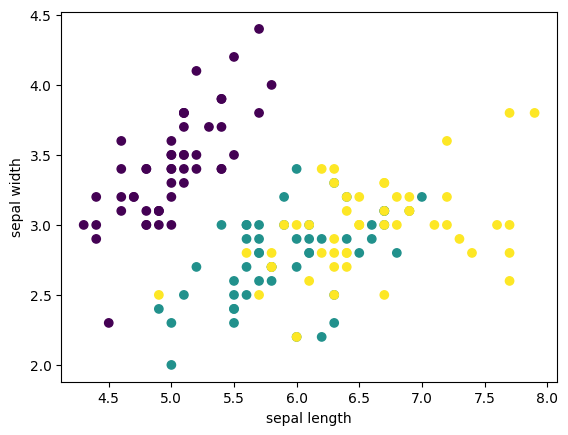

In [9]:
plt.scatter(data_ordinal.sepal_length, data_ordinal.sepal_width, c=data_ordinal.iris_class)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

#### Assignment

- Tulis kode program untuk menggambar scattered plot untuk semua kombinasi atribut, selain 'sepal length' - 'sepal width'.
- Untuk setiap plot, bisakah kalian menggambar garis lurus yang memisahkan spesies yang berbeda? (dengan perkiraan visual) Berapa kemiringan dan intersep dari garis yang Anda buat, dikira-kira saja?
- Implementasikan linear classifier yang kalian perkirakan di atas. Berapa akurasinya?

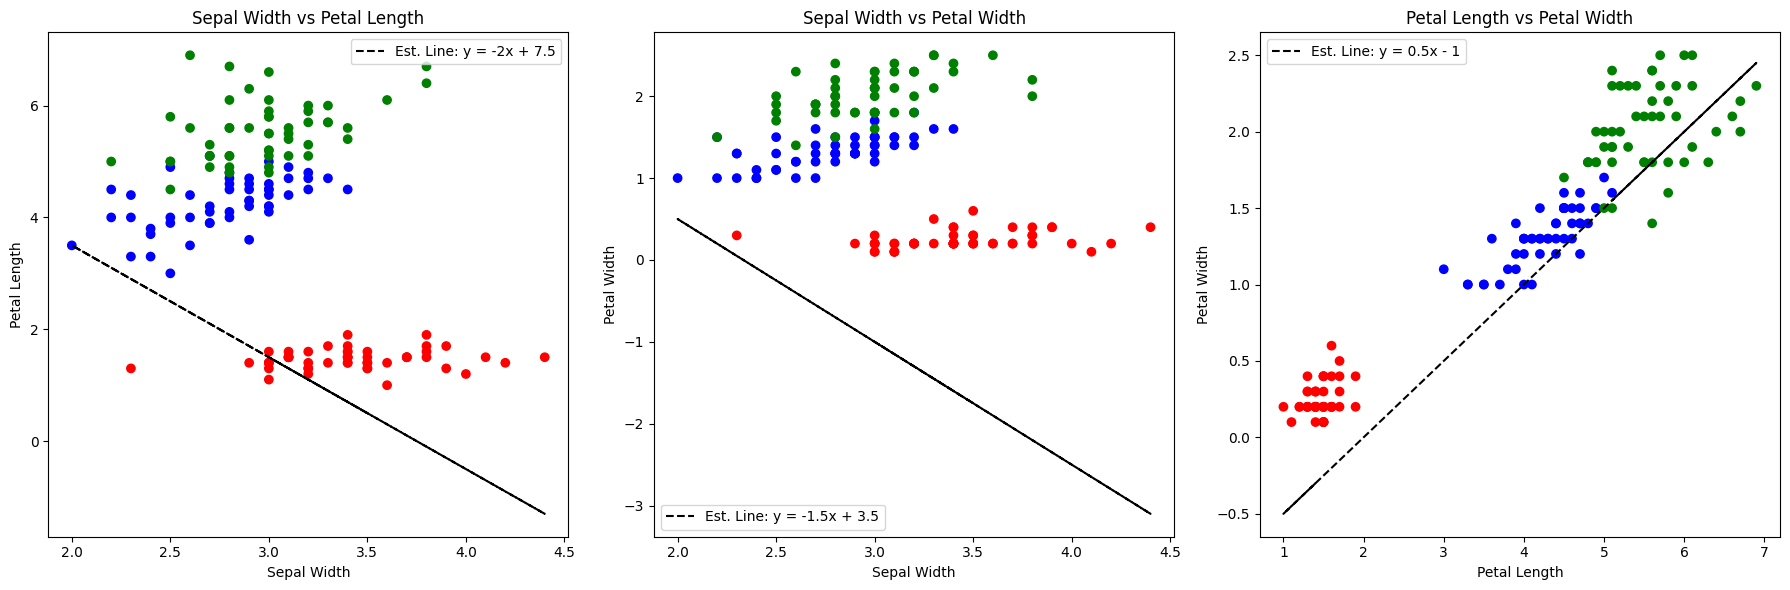

In [11]:
plt.figure(figsize=(18, 6))

# Scatter plot: Sepal Width vs Petal Length
plt.subplot(1, 3, 1)
plt.scatter(data['sepal_width'], data['petal_length'], c=data['iris_class'].apply(lambda x: {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}[x]))
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')
plt.title('Sepal Width vs Petal Length')

# Estimated line: y = -2x + 7.5
x_vals = data['sepal_width']
plt.plot(x_vals, -2 * x_vals + 7.5, 'k--', label="Est. Line: y = -2x + 7.5")
plt.legend()

# Scatter plot: Sepal Width vs Petal Width
plt.subplot(1, 3, 2)
plt.scatter(data['sepal_width'], data['petal_width'], c=data['iris_class'].apply(lambda x: {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}[x]))
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Sepal Width vs Petal Width')

# Estimated line: y = -1.5x + 3.5
plt.plot(x_vals, -1.5 * x_vals + 3.5, 'k--', label="Est. Line: y = -1.5x + 3.5")
plt.legend()

# Scatter plot: Petal Length vs Petal Width
plt.subplot(1, 3, 3)
plt.scatter(data['petal_length'], data['petal_width'], c=data['iris_class'].apply(lambda x: {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}[x]))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')

# Estimated line: y = 0.5x - 1
x_vals = data['petal_length']
plt.plot(x_vals, 0.5 * x_vals - 1, 'k--', label="Est. Line: y = 0.5x - 1")
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
# Simple linear classifier based on the estimated lines
def linear_classifier(row):
    # Based on Sepal Width vs Petal Length
    if row['petal_length'] < -2 * row['sepal_width'] + 7.5:
        return 'Iris-setosa'
    # Based on Petal Length vs Petal Width
    elif row['petal_width'] < 0.5 * row['petal_length'] - 1:
        return 'Iris-versicolor'
    else:
        return 'Iris-virginica'

data['predicted_class'] = data.apply(linear_classifier, axis=1)

correct_predictions = (data['predicted_class'] == data['iris_class']).sum()
total_predictions = len(data)
accuracy = correct_predictions / total_predictions * 100

print(f"Accuracy of linear classifier: {accuracy:.2f}%")
print(f"Correct Predictions: {correct_predictions}")
print(f"Incorrect Predictions: {total_predictions - correct_predictions}")

Accuracy of linear classifier: 32.00%
Correct Predictions: 48
Incorrect Predictions: 102


### 1.2. K-Nearest Neighbors

K-nearest neighbours, atau *KNN*, adalah salah satu algoritma machine learning (?) paling sederhana untuk supervised learning. Ada banyak library python yang menyediakan implementasi KNN, tetapi di sini, kita akan mengimplementasikan semuanya dari awal sendiri. Mengimplementasikan KNN sebenarnya tidak sulit, dan dari pengalaman mengimplementasikannya, kalian akan memperoleh beberapa wawasan yang lebih mendalam tentang cara kerja berbagai hal.

#### Train-Test Split

Pada dataset Iris, terdapat total 150 sampel bunga. Data ini akan dibagi menjadi dua kelompok: kelompok A dengan 120 bunga dan kelompok B dengan 30 bunga. Lalu "melatih" model KNN berdasarkan bunga-bunga dalam kelompok A, dan  *berpura-pura* bahwa kelompok B adalah serangkaian *kueri* yang tidak diketahui jawabannya. Misalnya, asumsikan kalian sedang membangun aplikasi untuk memberi tahu pengguna spesies Iris, berdasarkan bentuk daun (sepal) dan kelopaknya (petal). Kelompok A adalah serangkaian data yang sudah tersedia bagi kita (pengembang aplikasi) dan Kelompok B adalah antrean kueri yang akan dimasukkan secara acak oleh pengguna. Di data science, "Kelompok A" disebut *data latih* dan "Kelompok B" disebut *data uji*.

Di Python, ada beberapa fungsi yang bisa digunakan untuk memisah data latih dan data uji. Mari kita manfaatkan salah satu fungsi tersebut.

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_ordinal, test_size=0.2)

In [14]:
train

,sepal_length,sepal_width,petal_length,petal_width,iris_class
61,5.9,3.0,4.2,1.5,1
37,4.9,3.1,1.5,0.1,0
17,5.1,3.5,1.4,0.3,0
87,6.3,2.3,4.4,1.3,1
133,6.3,2.8,5.1,1.5,2
...,...,...,...,...,...
148,6.2,3.4,5.4,2.3,2
30,4.8,3.1,1.6,0.2,0
53,5.5,2.3,4.0,1.3,1
116,6.5,3.0,5.5,1.8,2


In [15]:
test

,sepal_length,sepal_width,petal_length,petal_width,iris_class
97,6.2,2.9,4.3,1.3,1
89,5.5,2.5,4.0,1.3,1
20,5.4,3.4,1.7,0.2,0
16,5.4,3.9,1.3,0.4,0
82,5.8,2.7,3.9,1.2,1
22,4.6,3.6,1.0,0.2,0
66,5.6,3.0,4.5,1.5,1
57,4.9,2.4,3.3,1.0,1
109,7.2,3.6,6.1,2.5,2
90,5.5,2.6,4.4,1.2,1


Sekarang, mari melatih KNN, kita buat variabel `train_np` untuk menampung numpy array DataFrame `train`.

In [16]:
train_np = train.to_numpy()
print(train_np)

[[5.9 3.  4.2 1.5 1. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [6.3 2.3 4.4 1.3 1. ]
 [6.3 2.8 5.1 1.5 2. ]
 [6.3 3.3 6.  2.5 2. ]
 [6.5 2.8 4.6 1.5 1. ]
 [5.6 3.  4.1 1.3 1. ]
 [6.1 2.6 5.6 1.4 2. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [5.1 3.8 1.6 0.2 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [6.  2.2 5.  1.5 2. ]
 [5.1 3.4 1.5 0.2 0. ]
 [6.1 2.9 4.7 1.4 1. ]
 [6.3 2.9 5.6 1.8 2. ]
 [7.1 3.  5.9 2.1 2. ]
 [4.6 3.1 1.5 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [6.3 2.5 4.9 1.5 1. ]
 [6.7 3.3 5.7 2.5 2. ]
 [6.  3.4 4.5 1.6 1. ]
 [5.8 2.7 5.1 1.9 2. ]
 [5.7 2.8 4.5 1.3 1. ]
 [6.  2.7 5.1 1.6 1. ]
 [7.7 2.8 6.7 2.  2. ]
 [5.9 3.2 4.8 1.8 1. ]
 [5.  3.3 1.4 0.2 0. ]
 [5.4 3.  4.5 1.5 1. ]
 [5.  3.  1.6 0.2 0. ]
 [7.4 2.8 6.1 1.9 2. ]
 [5.8 2.7 5.1 1.9 2. ]
 [6.4 2.8 5.6 2.1 2. ]
 [5.1 3.7 1.5 0.4 0. ]
 [6.1 3.  4.9 1.8 2. ]
 [5.6 2.8 4.9 2.  2. ]
 [6.1 3.  4.6 1.4 1. ]
 [5.4 3.7 1.5 0.2 0. ]
 [6.2 2.8 4.8 1.8 2. ]
 [5.2 4.1 1.5 0.1 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [5.2 2.7 3

Perhatikan bahwa empat kolom pertama adalah atribut yang akan kita gunakan untuk membuat prediksi (disebut *prediktor*) dan kolom terakhir adalah label spesies yang ingin kita prediksi (*output*). Untuk menyederhanakannya, kita akan secara eksplisit membagi kolom-kolom tersebut menjadi `train_X` dan `train_Y`.

In [17]:
train_X = train_np[:, 0:4]
train_Y = train_np[:, 4]

print(train_X)
print(train_Y)

[[5.9 3.  4.2 1.5]
 [4.9 3.1 1.5 0.1]
 [5.1 3.5 1.4 0.3]
 [6.3 2.3 4.4 1.3]
 [6.3 2.8 5.1 1.5]
 [6.3 3.3 6.  2.5]
 [6.5 2.8 4.6 1.5]
 [5.6 3.  4.1 1.3]
 [6.1 2.6 5.6 1.4]
 [5.  3.2 1.2 0.2]
 [5.1 3.8 1.5 0.3]
 [5.4 3.9 1.7 0.4]
 [5.1 3.8 1.6 0.2]
 [4.5 2.3 1.3 0.3]
 [6.  2.2 5.  1.5]
 [5.1 3.4 1.5 0.2]
 [6.1 2.9 4.7 1.4]
 [6.3 2.9 5.6 1.8]
 [7.1 3.  5.9 2.1]
 [4.6 3.1 1.5 0.2]
 [4.7 3.2 1.3 0.2]
 [6.3 2.5 4.9 1.5]
 [6.7 3.3 5.7 2.5]
 [6.  3.4 4.5 1.6]
 [5.8 2.7 5.1 1.9]
 [5.7 2.8 4.5 1.3]
 [6.  2.7 5.1 1.6]
 [7.7 2.8 6.7 2. ]
 [5.9 3.2 4.8 1.8]
 [5.  3.3 1.4 0.2]
 [5.4 3.  4.5 1.5]
 [5.  3.  1.6 0.2]
 [7.4 2.8 6.1 1.9]
 [5.8 2.7 5.1 1.9]
 [6.4 2.8 5.6 2.1]
 [5.1 3.7 1.5 0.4]
 [6.1 3.  4.9 1.8]
 [5.6 2.8 4.9 2. ]
 [6.1 3.  4.6 1.4]
 [5.4 3.7 1.5 0.2]
 [6.2 2.8 4.8 1.8]
 [5.2 4.1 1.5 0.1]
 [5.2 3.4 1.4 0.2]
 [5.2 2.7 3.9 1.4]
 [6.2 2.2 4.5 1.5]
 [4.9 3.1 1.5 0.1]
 [6.1 2.8 4.7 1.2]
 [7.2 3.2 6.  1.8]
 [6.5 3.2 5.1 2. ]
 [5.  2.  3.5 1. ]
 [6.3 3.3 4.7 1.6]
 [5.8 2.6 4.  1.2]
 [4.6 3.4 1.

Sekarang, mari simulasikan kueri pengguna dari kumpulan data uji. Dalam contoh ini, kita cukup pilih baris pertama dari kumpulan data uji dan beri nama `query`.

In [18]:
query = test.iloc[0]
print(query)

sepal_length    6.2
sepal_width     2.9
petal_length    4.3
petal_width     1.3
iris_class      1.0
Name: 97, dtype: float64


Di sini, dengan cara yang sama, kita akan mengubahnya menjadi array numpy dan "berpura-pura" tidak mengetahui spesies kueri ini dengan menghapus informasinya. Namun, karena kita akan memeriksa nanti apakah prediksi tersebut benar atau tidak, kita akan menyimpannya di suatu tempat untuk catatan kita.

In [19]:
query = query.to_numpy()
ground_truth = query[4]
query = np.delete(query, 4)
print(query)

[6.2 2.9 4.3 1.3]


Sekarang, kita akan mencari bunga mana dalam rangkaian data yang paling mirip dengan bunga kueri. Untuk melakukannya, pertama-tama kita hitung selisih antara setiap data rangkaian data dan kueri:

In [20]:
diff = np.abs(train_X - query)  # absolute difference
print(diff)

[[0.3 0.1 0.1 0.2]
 [1.3 0.2 2.8 1.2]
 [1.1 0.6 2.9 1. ]
 [0.1 0.6 0.1 0. ]
 [0.1 0.1 0.8 0.2]
 [0.1 0.4 1.7 1.2]
 [0.3 0.1 0.3 0.2]
 [0.6 0.1 0.2 0. ]
 [0.1 0.3 1.3 0.1]
 [1.2 0.3 3.1 1.1]
 [1.1 0.9 2.8 1. ]
 [0.8 1.  2.6 0.9]
 [1.1 0.9 2.7 1.1]
 [1.7 0.6 3.  1. ]
 [0.2 0.7 0.7 0.2]
 [1.1 0.5 2.8 1.1]
 [0.1 0.  0.4 0.1]
 [0.1 0.  1.3 0.5]
 [0.9 0.1 1.6 0.8]
 [1.6 0.2 2.8 1.1]
 [1.5 0.3 3.  1.1]
 [0.1 0.4 0.6 0.2]
 [0.5 0.4 1.4 1.2]
 [0.2 0.5 0.2 0.3]
 [0.4 0.2 0.8 0.6]
 [0.5 0.1 0.2 0. ]
 [0.2 0.2 0.8 0.3]
 [1.5 0.1 2.4 0.7]
 [0.3 0.3 0.5 0.5]
 [1.2 0.4 2.9 1.1]
 [0.8 0.1 0.2 0.2]
 [1.2 0.1 2.7 1.1]
 [1.2 0.1 1.8 0.6]
 [0.4 0.2 0.8 0.6]
 [0.2 0.1 1.3 0.8]
 [1.1 0.8 2.8 0.9]
 [0.1 0.1 0.6 0.5]
 [0.6 0.1 0.6 0.7]
 [0.1 0.1 0.3 0.1]
 [0.8 0.8 2.8 1.1]
 [0.  0.1 0.5 0.5]
 [1.  1.2 2.8 1.2]
 [1.  0.5 2.9 1.1]
 [1.  0.2 0.4 0.1]
 [0.  0.7 0.2 0.2]
 [1.3 0.2 2.8 1.2]
 [0.1 0.1 0.4 0.1]
 [1.  0.3 1.7 0.5]
 [0.3 0.3 0.8 0.7]
 [1.2 0.9 0.8 0.3]
 [0.1 0.4 0.4 0.3]
 [0.4 0.3 0.3 0.1]
 [1.6 0.5 2.

Sekarang, mari kita hitung jumlah perbedaan pada atribut-atribut yang berbeda.

In [21]:
sum_diff = np.sum(diff, axis=-1)
print(sum_diff)

[0.7 5.5 5.6 0.8 1.2 3.4 0.9 0.9 1.8 5.7 5.8 5.3 5.8 6.3 1.8 5.5 0.6 1.9
 3.4 5.7 5.9 1.3 3.5 1.2 2.  0.8 1.5 4.7 1.6 5.6 1.3 5.1 3.7 2.  2.4 5.6
 1.3 2.  0.6 5.5 1.1 6.2 5.5 1.7 1.1 5.5 0.7 3.5 2.1 3.2 1.2 1.1 6.  6.4
 5.6 1.6 1.1 0.6 5.9 1.8 0.8 3.5 2.  5.4 5.2 6.2 0.9 5.3 1.7 5.3 1.6 0.2
 5.4 5.5 3.  1.3 0.6 5.  1.3 4.6 2.1 0.5 2.7 2.8 5.7 1.3 1.7 4.4 1.9 2.9
 0.7 3.6 5.6 5.8 5.7 2.1 5.  5.5 3.4 5.7 1.7 2.5 2.  2.5 5.6 2.4 6.  5.4
 5.4 3.1 5.6 2.9 2.5 2.3 1.3 2.6 5.4 1.6 2.1 1.5]


Terakhir, kita akan menemukan k-nearest neighbors dengan memilih tetangga (neighbor) yang memiliki perbedaan terkecil. Untuk ini, `np.argpartition()` dapat sangat berguna, terutama saat Anda memiliki data yang besar. Fungsi ini mirip dengan `np.sort` dalam artian ia mencoba mengurutkan array input dalam urutan menaik. Namun, ia mengurutkan array hanya hingga k elemen pertama dan mengabaikan sisanya.

In [22]:
k = 5
idx = np.argpartition(sum_diff, k)
print(sum_diff[idx])  # Perhatikan bahwa hanya elemen sebanyak k pertama yang diurutkan

[0.2 0.5 0.6 0.6 0.6 0.6 0.7 0.7 0.7 1.1 0.8 0.9 1.3 0.9 0.9 0.8 1.2 0.8
 1.1 1.1 1.2 1.1 1.2 1.3 1.3 1.3 1.3 1.3 1.3 1.5 5.6 5.1 3.7 2.  2.4 5.6
 1.6 2.  4.7 5.5 1.5 6.2 5.5 1.7 2.  5.5 3.5 3.5 2.1 3.2 5.9 5.7 6.  6.4
 5.6 1.6 3.4 1.9 5.9 5.5 5.5 3.5 2.  5.4 5.2 6.2 1.8 5.3 1.7 5.3 1.6 6.3
 5.4 5.5 3.  5.8 5.3 5.  5.8 4.6 2.1 5.7 2.7 2.8 5.7 1.8 1.7 4.4 1.9 2.9
 3.4 3.6 5.6 5.8 5.7 2.1 5.  5.5 3.4 5.7 1.7 2.5 2.  2.5 5.6 2.4 6.  5.4
 5.4 3.1 5.6 2.9 2.5 2.3 5.6 2.6 5.4 1.6 2.1 1.8]


Akhirnya, label k-nearest neighbors dirangkum sebagai berikut:

In [23]:
knn = train_Y[idx[:k]]
print(knn)

[1. 1. 1. 1. 1.]


Label mana pun yang memperoleh suara terbanyak, itulah yang akan diprediksi sebagai spesies kueri.

In [24]:
uni, count = np.unique(knn, return_counts=True)
print('Predicted Class: ', uni[np.argmax(count)])
print('Ground Truth: ', ground_truth)             # compare with the ground truth

Predicted Class:  1.0
Ground Truth:  1.0


#### Assignment

- Tulias kode untuk mengklasifikasikan semua bunga dalam set data uji.
- Bandingkan hasil prediksi dengan kebenaran dasar yang sebenarnya. Berapa akurasinya?
- Gambarkan akurasi saat Anda memvariasikan k=1, 2, 3, ..., 20. Apakah akurasi berubah sepanjang k? Apakah ada pola yang dapat Anda amati?

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split dataset
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['iris_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Implement k-NN and calculate accuracy for k=1 to k=20
accuracies = []
k_values = range(1, 21)

for k in k_values:
    # Create and fit the k-NN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

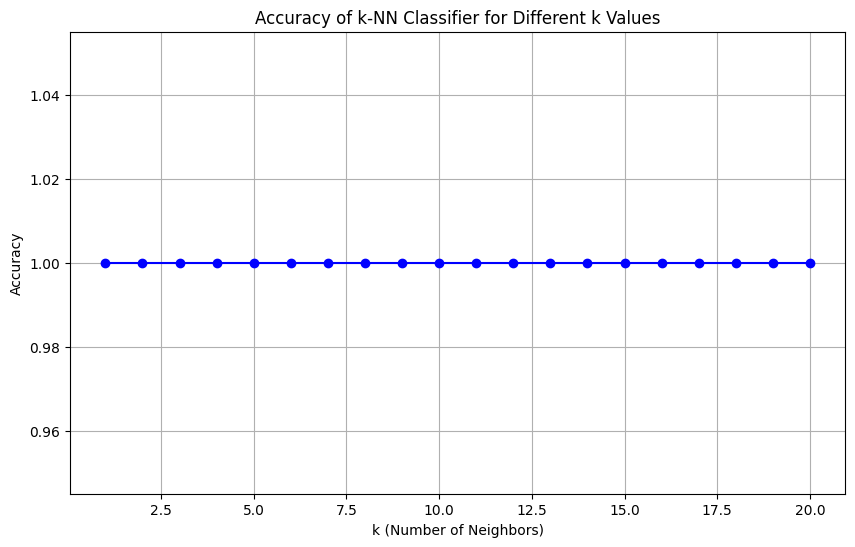

Highest Accuracy: 100.00% with k = 1


In [27]:
# Plot accuracy as a function of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy of k-NN Classifier for Different k Values')
plt.grid()
plt.show()

# Step 5: Print the best accuracy and corresponding k
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print(f"Highest Accuracy: {best_accuracy * 100:.2f}% with k = {best_k}")

Grafik menunjukkan bahwa akurasi k-NN tetap sama, yaitu 1, untuk semua nilai k dari 1 sampai 20. Ini berarti algoritma k-NN selalu berhasil mengklasifikasikan data dengan benar, tidak peduli berapa banyak tetangga yang digunakan. Hal ini kemungkinan terjadi karena data yang digunakan sangat sederhana atau sudah terpisah dengan jelas, sehingga jumlah tetangga tidak berpengaruh pada hasilnya. Selain itu, mungkin juga data sudah diproses dengan baik sehingga k-NN bisa bekerja dengan stabil dan konsisten.